In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 200
# 불러들이는 데이터에 맞춰 모든 컬럼을 확인 가능하도록 옵션값을 주었습니다.
pd.options.display.max_info_columns =200

In [18]:
df_train = pd.read_csv("/Users/krc/Downloads/pubg-finish-placement-prediction/train_V2.csv")

In [19]:
df_train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [20]:
df_train.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [22]:
df_train.corr()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
assists,1.000000,0.307683,0.406726,0.301057,0.198289,0.228556,-0.290062,0.039066,0.319690,0.243471,0.261425,-0.019450,-0.147916,-0.146804,-0.016407,0.198320,0.110644,0.011903,0.023372,0.006081,0.057921,0.290306,0.243882,0.024014,0.299441
boosts,0.307683,1.000000,0.521947,0.358907,0.334661,0.535854,-0.554844,0.008347,0.502024,0.405327,0.423290,0.072108,-0.013686,-0.012929,0.023202,0.253125,0.328855,0.035124,0.107993,0.013068,0.087387,0.640150,0.406609,-0.007644,0.634234
damageDealt,0.406726,0.521947,1.000000,0.735763,0.613409,0.342987,-0.677398,0.049904,0.888783,0.703599,0.563837,-0.006755,-0.040707,-0.040078,-0.001460,0.256951,0.140883,0.052487,0.036729,0.015468,0.081182,0.398199,0.353249,0.017762,0.440507
DBNOs,0.301057,0.358907,0.735763,1.000000,0.469923,0.265485,-0.555289,0.042616,0.707848,0.646872,0.451422,-0.014485,-0.267709,-0.265788,-0.003451,0.300999,0.102537,0.036093,0.017320,0.069430,0.060210,0.284660,0.218161,0.011108,0.279970
headshotKills,0.198289,0.334661,0.613409,0.469923,1.000000,0.199918,-0.469829,0.023988,0.674275,0.512882,0.447261,-0.017657,0.009211,0.009389,0.005118,0.150145,0.076495,0.013369,0.028531,0.008658,0.039200,0.250982,0.217552,0.004982,0.277722
heals,0.228556,0.535854,0.342987,0.265485,0.199918,1.000000,-0.386032,-0.002585,0.311781,0.270412,0.263278,0.108901,-0.064759,-0.064204,0.019142,0.236680,0.297484,0.024619,0.079587,0.035386,0.062870,0.430266,0.309071,-0.010990,0.427857
killPlace,-0.290062,-0.554844,-0.677398,-0.555289,-0.469829,-0.386032,1.000000,-0.023277,-0.730498,-0.810516,-0.541146,-0.005804,0.016792,0.018786,-0.014805,-0.269804,-0.236202,-0.057356,-0.089396,-0.037797,-0.073569,-0.590236,-0.490143,-0.002415,-0.719069
killPoints,0.039066,0.008347,0.049904,0.042616,0.023988,-0.002585,-0.023277,1.000000,0.036192,0.037091,0.014084,-0.099540,-0.044802,-0.042366,-0.975555,0.012041,-0.029316,-0.004156,-0.004604,-0.039739,-0.009658,0.004630,-0.003978,0.983417,0.012908
kills,0.319690,0.502024,0.888783,0.707848,0.674275,0.311781,-0.730498,0.036192,1.000000,0.802500,0.602936,-0.030687,-0.004847,-0.004060,0.008199,0.253323,0.114750,0.063651,0.039127,0.017601,0.079991,0.374774,0.336414,0.006929,0.419916
killStreaks,0.243471,0.405327,0.703599,0.646872,0.512882,0.270412,-0.810516,0.037091,0.802500,1.000000,0.515097,-0.034644,-0.037338,-0.036054,0.003426,0.241695,0.098420,0.065575,0.034588,0.027612,0.064374,0.327639,0.275373,0.008552,0.377566


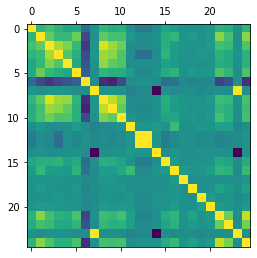

In [23]:
plt.matshow(df_train.corr())
plt.show()

# <span style="color:red"> 아래 셀이 copied 를 초기화합니다! </span>

# ===============================

In [25]:
copied = df_train.copy()
copied.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [26]:
copied.loc[0]

Id                 7f96b2f878858a
groupId            4d4b580de459be
matchId            a10357fd1a4a91
assists                         0
boosts                          0
damageDealt                   0.0
DBNOs                           0
headshotKills                   0
heals                           0
killPlace                      60
killPoints                   1241
kills                           0
killStreaks                     0
longestKill                   0.0
matchDuration                1306
matchType               squad-fpp
maxPlace                       28
numGroups                      26
rankPoints                     -1
revives                         0
rideDistance                  0.0
roadKills                       0
swimDistance                  0.0
teamKills                       0
vehicleDestroys                 0
walkDistance                244.8
weaponsAcquired                 1
winPoints                    1466
winPlacePerc               0.4444
Name: 0, dtype

In [27]:
# copied[copied["matchType"] == "squad-fpp"]["matchType"] = 'test'

copied["matchType"]

0          squad-fpp
1          squad-fpp
2                duo
3          squad-fpp
4           solo-fpp
             ...    
4446961    squad-fpp
4446962         solo
4446963    squad-fpp
4446964    squad-fpp
4446965     solo-fpp
Name: matchType, Length: 4446966, dtype: object

In [28]:
copied.loc[copied["matchType"] == "squad-fpp", "matchType"] = "squad"
copied.loc[copied["matchType"] == "duo-fpp", "matchType"] = "duo"
copied.loc[copied["matchType"] == "solo-fpp", "matchType"] = "solo"

In [29]:
copied.loc[copied["matchType"] == "squad", "matchType"] = 3
copied.loc[copied["matchType"] == "duo", "matchType"] = 2
copied.loc[copied["matchType"] == "solo", "matchType"] = 1
copied.loc[(copied["matchType"] != 1) & (copied["matchType"] != 2) & (copied["matchType"] != 3), "matchType"] = 4

In [30]:
copied["matchType"].value_counts().to_frame()

,matchType
3,2382712
2,1310282
1,718705
4,35267


In [33]:
# 여기서 같은 게임 참가자들은 전부 같은 matchDuration 을 갖는다는 걸 발견했습니다
copied.loc[(copied['matchDuration'] > 0) & (copied['matchId'] == 'a10357fd1a4a91'), ['matchId','matchDuration']]

,matchId,matchDuration
0,a10357fd1a4a91,1306
14605,a10357fd1a4a91,1306
56361,a10357fd1a4a91,1306
94575,a10357fd1a4a91,1306
124418,a10357fd1a4a91,1306
...,...,...
4156932,a10357fd1a4a91,1306
4171661,a10357fd1a4a91,1306
4250152,a10357fd1a4a91,1306
4342185,a10357fd1a4a91,1306


In [34]:
copied.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [35]:
# 불필요한 컬럼들을 다 뺐습니다
copied.drop(columns = ['Id', 'groupId', 'matchId', 'killPlace', 'killPoints', 'matchDuration', 'numGroups', 'rankPoints', 'roadKills', 'teamKills', 'winPoints'], inplace=True)
copied.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,kills,killStreaks,longestKill,matchType,maxPlace,revives,rideDistance,swimDistance,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc
0,0,0,0.00,0,0,0,0,0,0.00,3,28,0,0.0000,0.00,0,244.80,1,0.4444
1,0,0,91.47,0,0,0,0,0,0.00,3,26,0,0.0045,11.04,0,1434.00,5,0.6400
2,1,0,68.00,0,0,0,0,0,0.00,2,50,0,0.0000,0.00,0,161.80,2,0.7755
3,0,0,32.90,0,0,0,0,0,0.00,3,31,0,0.0000,0.00,0,202.70,3,0.1667
4,0,0,100.00,0,0,0,1,1,58.53,1,97,0,0.0000,0.00,0,49.75,2,0.1875


In [36]:
copied[copied['matchType'] == 1].describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,kills,killStreaks,longestKill,maxPlace,revives,rideDistance,swimDistance,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc
count,718705.000000,718705.000000,718705.000000,718705.0,718705.000000,718705.000000,718705.000000,718705.000000,718705.000000,718705.000000,718705.0,718705.000000,718705.000000,718705.000000,718705.000000,718705.000000,718704.000000
mean,0.057128,1.060768,117.322839,0.0,0.244533,1.010298,0.918579,0.472444,21.447503,94.112685,0.0,463.401628,5.091322,0.004519,955.661579,3.555083,0.487273
std,0.245404,1.800157,158.590893,0.0,0.634063,2.399439,1.497002,0.559173,46.404703,9.364130,0.0,1374.520898,34.188694,0.069678,1070.111997,2.388016,0.298412
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,0.0,0.000000,0.000000,0.000000,100.500000,2.000000,0.229200
50%,0.000000,0.000000,73.960000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,96.000000,0.0,0.000000,0.000000,0.000000,502.700000,3.000000,0.483900
75%,0.000000,2.000000,168.600000,0.0,0.000000,1.000000,1.000000,1.000000,20.690000,97.000000,0.0,0.000000,0.000000,0.000000,1588.000000,5.000000,0.747400
max,5.000000,28.000000,2490.000000,0.0,19.000000,63.000000,23.000000,18.000000,1001.000000,100.000000,0.0,40710.000000,1974.000000,5.000000,25780.000000,153.000000,1.000000


In [37]:
# movingDistance 라는 컬럼을 만들어서 모든 수단의 이동거리를 합쳤습니다
copied["movingDistance"] = copied["rideDistance"] + copied["swimDistance"] + copied["walkDistance"]

In [38]:
copied.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,kills,killStreaks,longestKill,matchType,maxPlace,revives,rideDistance,swimDistance,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc,movingDistance
0,0,0,0.00,0,0,0,0,0,0.00,3,28,0,0.0000,0.00,0,244.80,1,0.4444,244.8000
1,0,0,91.47,0,0,0,0,0,0.00,3,26,0,0.0045,11.04,0,1434.00,5,0.6400,1445.0445
2,1,0,68.00,0,0,0,0,0,0.00,2,50,0,0.0000,0.00,0,161.80,2,0.7755,161.8000
3,0,0,32.90,0,0,0,0,0,0.00,3,31,0,0.0000,0.00,0,202.70,3,0.1667,202.7000
4,0,0,100.00,0,0,0,1,1,58.53,1,97,0,0.0000,0.00,0,49.75,2,0.1875,49.7500


In [39]:
# 각 이동거리들 관련 컬럼은 삭제했습니다
copied.drop(columns = ['rideDistance', 'swimDistance', 'walkDistance'], inplace=True)
copied.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,kills,killStreaks,longestKill,matchType,maxPlace,revives,vehicleDestroys,weaponsAcquired,winPlacePerc,movingDistance
0,0,0,0.00,0,0,0,0,0,0.00,3,28,0,0,1,0.4444,244.8000
1,0,0,91.47,0,0,0,0,0,0.00,3,26,0,0,5,0.6400,1445.0445
2,1,0,68.00,0,0,0,0,0,0.00,2,50,0,0,2,0.7755,161.8000
3,0,0,32.90,0,0,0,0,0,0.00,3,31,0,0,3,0.1667,202.7000
4,0,0,100.00,0,0,0,1,1,58.53,1,97,0,0,2,0.1875,49.7500


In [40]:
copied.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'kills', 'killStreaks', 'longestKill', 'matchType', 'maxPlace',
       'revives', 'vehicleDestroys', 'weaponsAcquired', 'winPlacePerc',
       'movingDistance'],
      dtype='object')

In [41]:
# movingDistance 컬럼을 조금 앞으로 이동했습니다
copied = copied[['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'kills', 'killStreaks', 'longestKill', 'matchType', 'maxPlace',
       'revives', 'movingDistance', 'vehicleDestroys', 'weaponsAcquired', 'winPlacePerc']]
copied.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,kills,killStreaks,longestKill,matchType,maxPlace,revives,movingDistance,vehicleDestroys,weaponsAcquired,winPlacePerc
0,0,0,0.00,0,0,0,0,0,0.00,3,28,0,244.8000,0,1,0.4444
1,0,0,91.47,0,0,0,0,0,0.00,3,26,0,1445.0445,0,5,0.6400
2,1,0,68.00,0,0,0,0,0,0.00,2,50,0,161.8000,0,2,0.7755
3,0,0,32.90,0,0,0,0,0,0.00,3,31,0,202.7000,0,3,0.1667
4,0,0,100.00,0,0,0,1,1,58.53,1,97,0,49.7500,0,2,0.1875


In [64]:
# matchType == 4 이고 즉, 이벤트 매치이고 총 이동거리가 5000이 넘는 행에 대해 describe를 하여 값들을 분석했습니다
copied[(copied["movingDistance"] > 5000) & (copied["matchType"] != 4)].describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,kills,killStreaks,longestKill,maxPlace,revives,movingDistance,vehicleDestroys,weaponsAcquired,winPlacePerc
count,400840.000000,400840.000000,400840.000000,400840.000000,400840.000000,400840.000000,400840.000000,400840.000000,400840.000000,400840.000000,400840.000000,400840.000000,400840.000000,400840.000000,400840.000000
mean,0.469270,2.938374,218.826627,1.088479,0.405396,3.798338,1.594621,0.795153,58.382089,40.825549,0.335356,7054.455542,0.037589,5.666221,0.797048
std,0.829759,2.184052,230.498515,1.540444,0.841588,4.218534,2.059837,0.782383,87.957994,20.805977,0.653349,1791.268970,0.200642,2.196360,0.161853
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,5000.140000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,51.450000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,28.000000,0.000000,5706.000000,0.000000,4.000000,0.692300
50%,0.000000,3.000000,153.300000,1.000000,0.000000,2.000000,1.000000,1.000000,15.100000,30.000000,0.000000,6608.000000,0.000000,5.000000,0.827600
75%,1.000000,4.000000,313.100000,2.000000,1.000000,5.000000,2.000000,1.000000,88.892500,48.000000,1.000000,7927.031000,0.000000,7.000000,0.928600
max,10.000000,24.000000,3796.000000,32.000000,26.000000,73.000000,33.000000,18.000000,999.900000,100.000000,28.000000,41270.100000,5.000000,236.000000,1.000000
